## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
df = pd.read_csv('50_Startups.csv')
print(df)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

## Extracting x and y from the data

In [3]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(x)
print(y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

## Encoding the categorical data

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[3])], remainder='passthrough')
x = ct.fit_transform(x)
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## splitting the data set into training set and test set

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

## creating and training the model

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # to create the linear regression model we create the object of the 
# LinearRegression class with default values
regressor.fit(x_train,y_train) # and to train the model we use the fit function with training set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the values

In [7]:
y_pred = regressor.predict(x_test)
# calculating the y values from the trained model
# now these calculated values will be compared with y_test values to know the errors and r2_score

## Checking the erros and the r2 score

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)

7024.539954003202
73809312.88225932
8591.234654126223
0.9315815199152447


#### remeber we have 7 variables here i am going to show you one combination in 2-D and 3-D

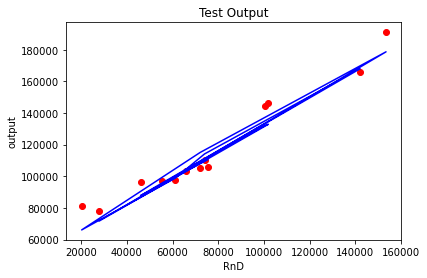

In [12]:
# for 2-D i will be using Rnd column and the y
plt.scatter(x_test[:,3],y_test,color = 'red')
plt.plot(x_test[:,3],y_pred,color = 'blue')
plt.title('Test Output')
plt.xlabel('RnD')
plt.ylabel('output')
plt.show()

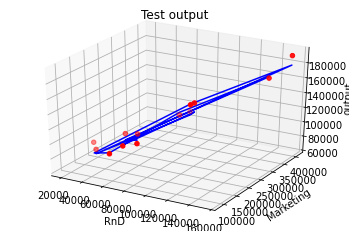

In [15]:
# for 3D i will use Rnd, Marketing and Y
# to plot 3d one subset of matplotlib library is used
from mpl_toolkits import mplot3d
# to create a 3d plot we add a 3D subplot on a matplotlib figure
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_test[:,3],x_test[:,5],y_test, color = 'red')
ax.plot3D(x_test[:,3],x_test[:,5],y_pred, color = 'blue')
ax.set_title('Test output')
ax.set_xlabel('RnD')
ax.set_ylabel('Marketing')
ax.set_zlabel('output')
plt.show()

## Performing backward elimination to remove the insignificant columns

In [17]:
# for this we will prepare our x since we will do it manually we need to remove one dummy varibale and add the constant column
X = x[:, 1:] # removing the first dummy variable column
constant = np.ones((50,1)).astype(int)
# here i am creating a numpy array of 50 rows and 1 column having '1' as value
# now i will use the append function to join the constant np array with x
# the append function takes 3 inputs 1 & 2 - arr & values are the arrays your are joining 3- axis on which you want to join
X = np.append(arr = constant , values = X, axis = 1)
print(X)

[[1 0.0 1.0 165349.2 136897.8 471784.1]
 [1 0.0 0.0 162597.7 151377.59 443898.53]
 [1 1.0 0.0 153441.51 101145.55 407934.54]
 [1 0.0 1.0 144372.41 118671.85 383199.62]
 [1 1.0 0.0 142107.34 91391.77 366168.42]
 [1 0.0 1.0 131876.9 99814.71 362861.36]
 [1 0.0 0.0 134615.46 147198.87 127716.82]
 [1 1.0 0.0 130298.13 145530.06 323876.68]
 [1 0.0 1.0 120542.52 148718.95 311613.29]
 [1 0.0 0.0 123334.88 108679.17 304981.62]
 [1 1.0 0.0 101913.08 110594.11 229160.95]
 [1 0.0 0.0 100671.96 91790.61 249744.55]
 [1 1.0 0.0 93863.75 127320.38 249839.44]
 [1 0.0 0.0 91992.39 135495.07 252664.93]
 [1 1.0 0.0 119943.24 156547.42 256512.92]
 [1 0.0 1.0 114523.61 122616.84 261776.23]
 [1 0.0 0.0 78013.11 121597.55 264346.06]
 [1 0.0 1.0 94657.16 145077.58 282574.31]
 [1 1.0 0.0 91749.16 114175.79 294919.57]
 [1 0.0 1.0 86419.7 153514.11 0.0]
 [1 0.0 0.0 76253.86 113867.3 298664.47]
 [1 0.0 1.0 78389.47 153773.43 299737.29]
 [1 1.0 0.0 73994.56 122782.75 303319.26]
 [1 1.0 0.0 67532.53 105751.03 30476

In [19]:
# I am again creating a copy to show the elimination process and this varibale will contain the final significant columns
x_opt = np.array(X[:,[0,1,2,3,4,5]],dtype = float)
# since we are creating a statistical model of our dataset we we need statsmodels library
import statsmodels.api as sm
stats = sm.OLS(endog = y, exog = x_opt).fit()
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 27 Jun 2020   Prob (F-statistic):           1.34e-27
Time:                        12:06:52   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
x_opt = np.array(X[:,[0,1,3,4,5]],dtype = float) # removed the D2 with index 2
stats = sm.OLS(endog = y, exog = x_opt).fit()
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 27 Jun 2020   Prob (F-statistic):           8.49e-29
Time:                        12:09:15   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
x_opt = np.array(X[:,[0,3,4,5]],dtype = float) # removed the D2-2, D1-1
stats = sm.OLS(endog = y, exog = x_opt).fit()
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 27 Jun 2020   Prob (F-statistic):           4.53e-30
Time:                        12:10:17   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
x_opt = np.array(X[:,[0,3,5]],dtype = float) # removed the D2-2, D1-1, Admin-4
stats = sm.OLS(endog = y, exog = x_opt).fit()
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 27 Jun 2020   Prob (F-statistic):           2.16e-31
Time:                        12:11:50   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
x_opt = np.array(X[:,[0,3]],dtype = float) # removed the D2-2, D1-1, Admin-4, Marketing-5
stats = sm.OLS(endog = y, exog = x_opt).fit()
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 27 Jun 2020   Prob (F-statistic):           3.50e-32
Time:                        12:12:13   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# splitting the x_opt in trainig set and test set to verify the theory
x_tr,x_te,y_tr,y_te = train_test_split(x_opt,y,test_size = 0.25,random_state = 0)

In [26]:
# creating the LinearRegression model and predicting the output
reg = LinearRegression()
reg.fit(x_tr,y_tr)
y_pr = reg.predict(x_te)

In [27]:
# Calculate the r2_score to the accuracy of the model
r = r2_score(y_te,y_pr)
print(r)

0.9416094803899032


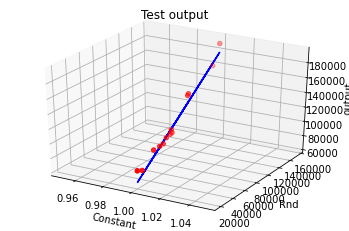

In [29]:
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_te[:,0],x_te[:,1],y_te, color = 'red')
ax.plot3D(x_te[:,0],x_te[:,1],y_pr, color = 'blue')
ax.set_title('Test output')
ax.set_xlabel('Constant')
ax.set_ylabel('Rnd')
ax.set_zlabel('output')
plt.show()